<a href="https://colab.research.google.com/github/202422/Online-Shoppers-Purchasing-Intention/blob/main/Univariate%20and%20Bivariate%20Analysis/Univariate%20and%20Bivariate%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Packages and Dataset Import**

In [1]:
!pip install plotly --upgrade

In [2]:
!pip install -U kaleido

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.display import Image

In [4]:
df = pd.read_csv("/content/Cleaned_dataset.csv")
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
1,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
2,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.000000,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
4,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.000000,0.4,Feb,2,4,1,2,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9176,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
9177,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
9178,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
9179,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [5]:
# Create lists of quantitative and qualitative features
quantitative_features = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
qualitative_features = [x for x in df.columns.to_list() if x not in quantitative_features]
qualitative_features.remove('Revenue')

In [6]:
qualitative_features

['Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend']

# **I. Univariate Analysis**

## **1. Quantitative features**

## **a. Summary Statistics**

In [7]:
df[quantitative_features].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,9181.000000,9181.000000,9181.000000,9181.000000,9181.000000,9181.000000,9181.000000,9181.000000,9181.000000,9181.00000
mean,1.599826,45.781779,0.237229,8.748442,23.602440,855.208819,0.010748,0.034536,2.600721,0.06618
std,2.137123,75.823686,0.631535,33.534652,22.094905,908.645567,0.018191,0.027548,7.558149,0.20663
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,199.490476,0.000000,0.014545,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,16.000000,535.500000,0.000000,0.026316,0.000000,0.00000
75%,3.000000,65.500000,0.000000,0.000000,32.000000,1202.875000,0.014286,0.046667,0.000000,0.00000
max,8.000000,436.000000,3.000000,313.000000,121.000000,5044.756890,0.110714,0.133333,43.252000,1.00000


These statistics present us many informations like the number of observations (9181) in dataset. But most importants ones show that:


*   users visit the **administrative pages** on average **1.59 times**, the maximum number of visited administrative pages is **8** while the minimum is **0**
*   users last on **Administrative pages** on average **45.78**, the maximum time spent on these pages is **436.0** while the minimum is **0**
*   **informational pages** are visited on average **0.23**, the maximum number of visits is **3** while the minimum is **0**.
*   users last on average **8.74** on **informational pages**, the maximum time spent on these pages is **313.0** while the minimum is **0**
*   pages **related to product** are visited **23.6 times** on average, the maximum number of page visited by a user is **121** while the minimum is **0**
*   average **time spent on product related pages** is **855.2**, the maximum time is **5044.76** while the minimum is **0**.
*   a mean value of **bounce rates** is **0.01**, the maximum is **0.11** and the minimum is **0**
*   a mean value of **exit rates** is **0.03**, the maximum is **0.13** and the minimum is **0**
*   a mean value of **PageValues** is **2.6**, the maximum is **43.25** and the minimum is **0**
*   the average **closeness of the site's visit to a Special Day** is **0.06**, the maximum closeness is **1** while the minimum is **0**

### **b. Visualization**

In [9]:
# Displaying histogram and boxplot for each quantitative feature
for i, col in enumerate(quantitative_features):
  fig1 = px.histogram(df, x = col)
  fig2 = px.box(df, y = col, points = "all")
  fig = make_subplots(rows=1, cols=2, subplot_titles = [f"Histogram of {col}",f"Boxplot of {col}"])
  fig.add_traces(fig1.data, rows = 1, cols = 1)
  fig.add_traces(fig2.data, rows = 1, cols = 2)

  # Define a unique filename for each column
  filename = f"plot_{i}_{col}.png"

  # Save figure
  fig.write_image(filename)

  fig.show()

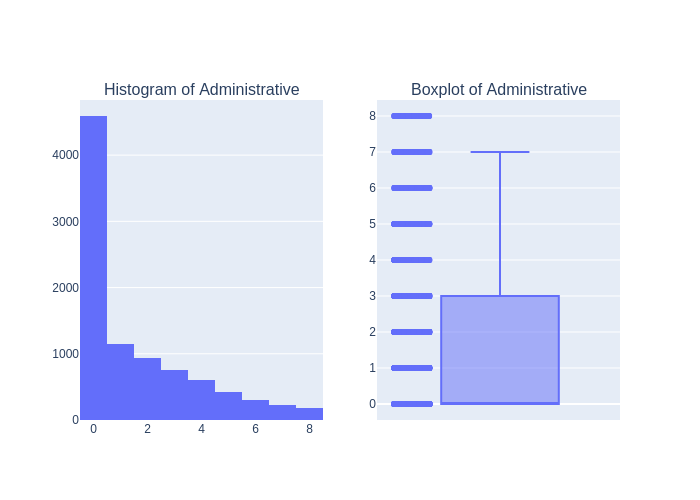

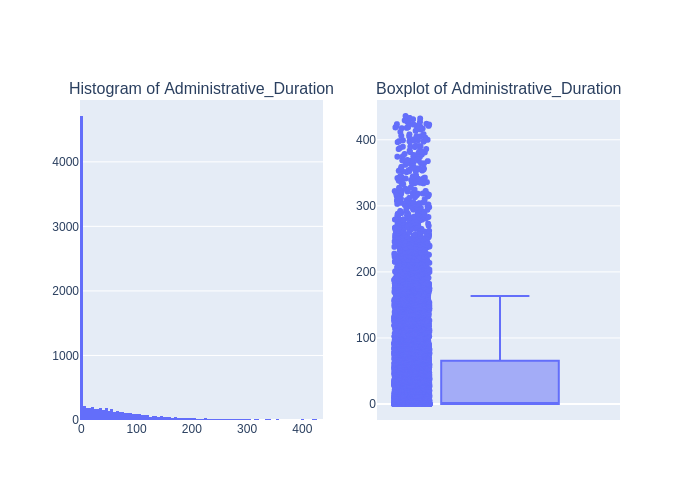

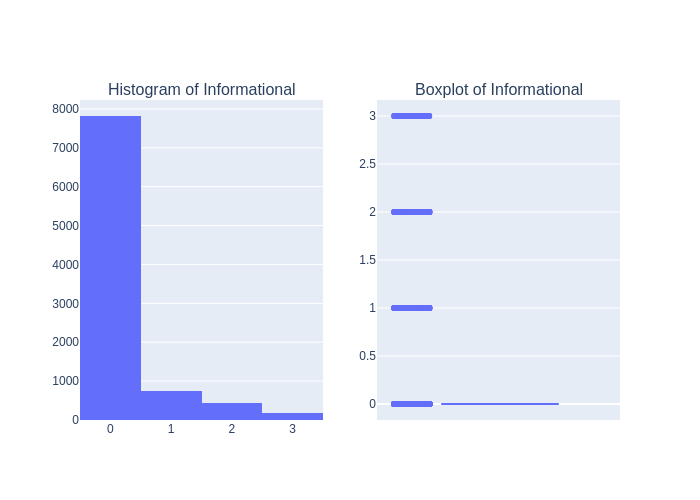

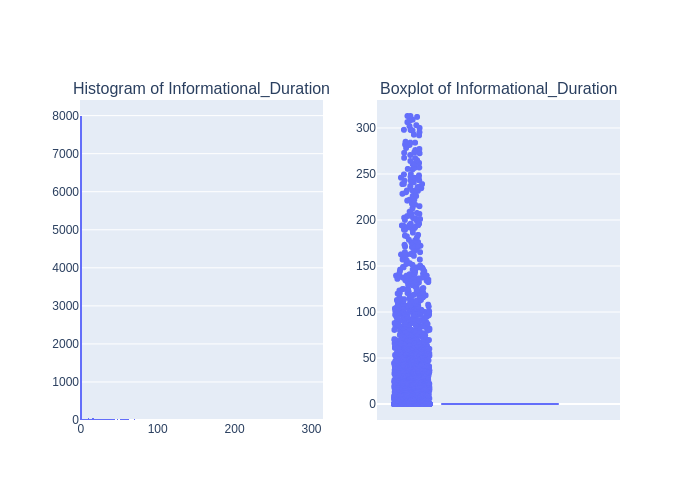

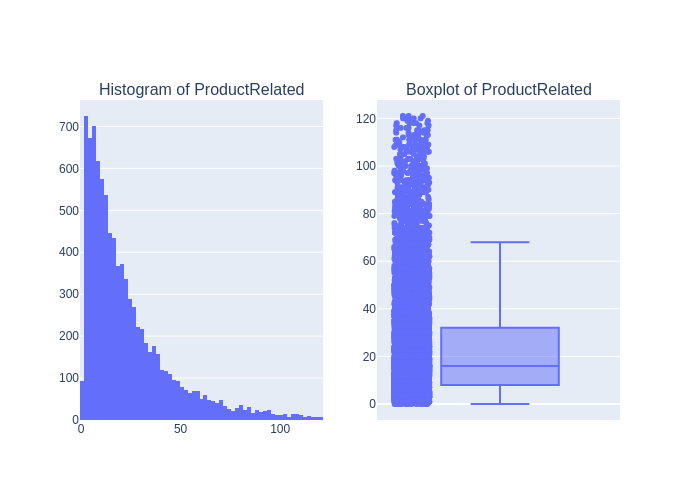

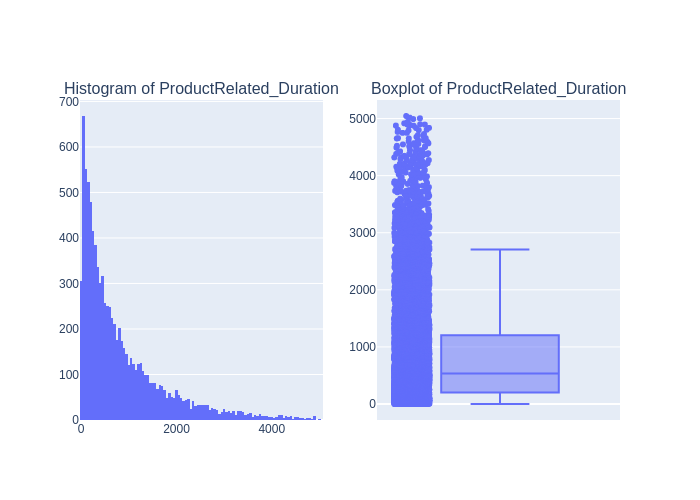

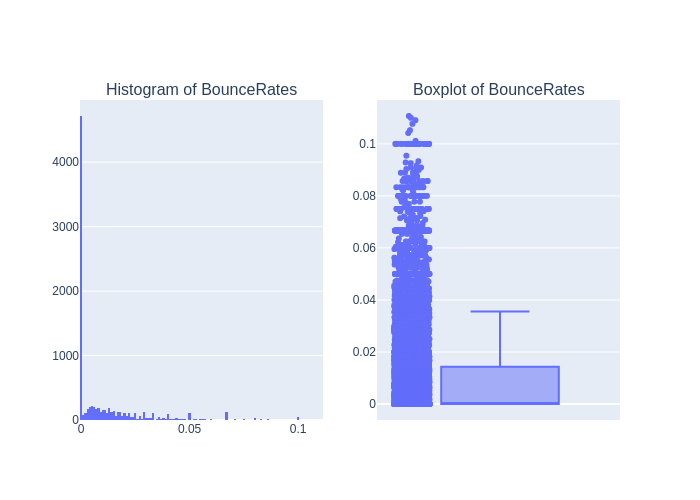

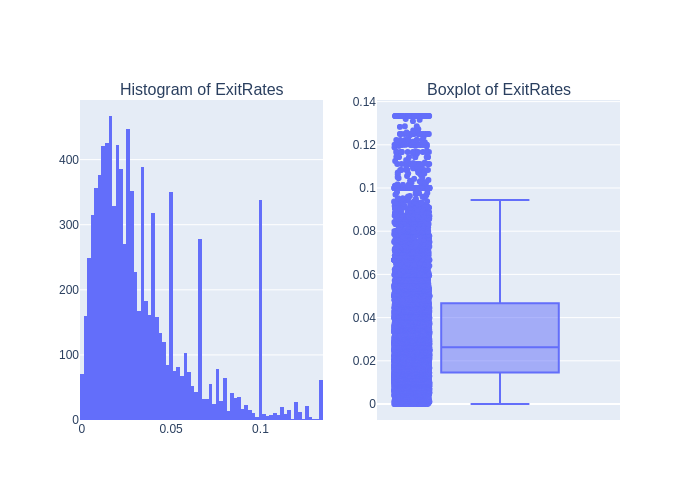

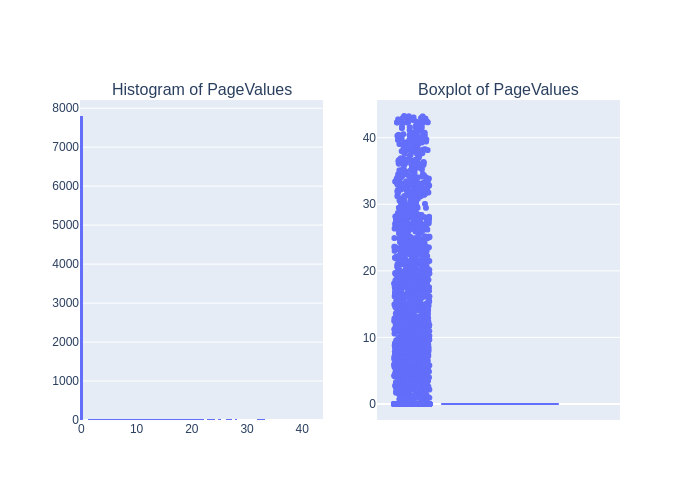

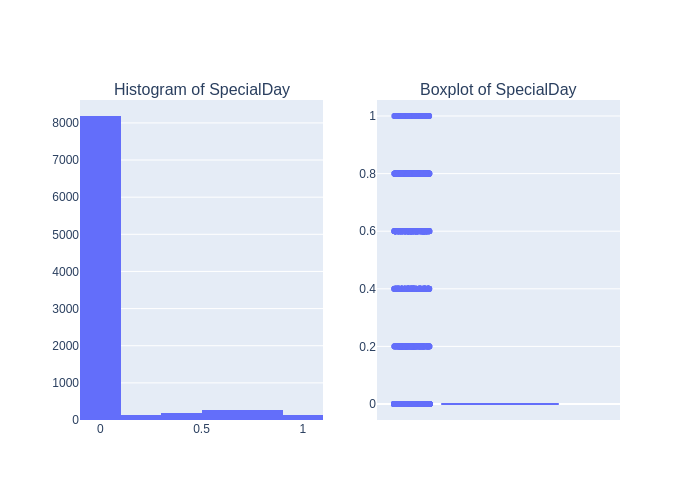

In [11]:
for i, col in enumerate(quantitative_features):
    # Filename for each column
    filename = f"plot_{i}_{col}.png"

    # Display the saved image in Colab
    display(Image(filename))